# Machine Learning Simulation Coursework - Random Projections
Maximilian Zebhauser

### Task: 
Write a program that projects the n standard basis vectors in $\mathbb{R}^n$ to a 
random 2-dimensional subspace. (You may do this simply by using a $2 \times n$ 
matrix whose entries are i.i.d. normals.) Center the point set appropriately 
and re-scale such that the empirical variance of the (say) first component 
equals 1. Plot the obtained point set. Now generate n independent standard 
normal vectors on the plane and compare the two plots. Do this for a wide range 
of values of n. What do you see?
### Theoretical Background: 
Given a function $f: \mathbb{R}^D \rightarrow \mathbb{R}^d $, which preserves pairwise distances: 
$\left\|f\left(a_{i}\right)-f\left(a_{j}\right)\right\| \approx \left\|a_{i}-a_{j}\right\| $. 
For exact equality, this only holds if the data lives in the subspace $\mathbb{R}^d$. 
But allowing for some slack in the following form, guarantees that such a function exists for 
$ d \geq \frac{8 \log N}{\epsilon^{2}}$: 
$$ 1-\epsilon \leq \frac{\left\|f\left(a_{i}\right)-f\left(a_{j}\right)\right\|^{2}}{\left\|a_{i}-a_{j}\right\|^{2}} \leq 1+\epsilon,  \qquad  \epsilon > 0 $$
It even exists for a random linear function $ W = (W_{i,j})_{d \times D} $ where $ W_{i,j} 
\sim N(N,\frac{1}{d}) $ and this can be bounded using Chernoff: 
$$ \mathbb{P}\left( \max_{j = 1 \dots N} \left| \frac{\left\| W \left(a_{i} - a_{j}\right)\right\|^{2}}{\left\|a_{i}-a_{j}\right\|^{2}}  \right| \geq \epsilon \right) \leq n^2 e^{- \frac{\epsilon^2 d}{4}},  \quad  \text{ wherever }  \quad d \geq \frac{4 \log (\frac{n^2} {\delta})} {\epsilon^2} \quad \text { w.p. } > 1-\delta $$
### Answer: 
The plots clearly show that the random projection of basis vectors from $R^n 
\rightarrow R^2$ converges to a standard normal distribution with increasing sample size. 
This is not too surprising since the projection basically a multiplication of the identity matrix 
with a random normal distributed matrix. After scaling the product of this multiplication the 
result should be close to normally distributed.
### Supporting Code & Plots:

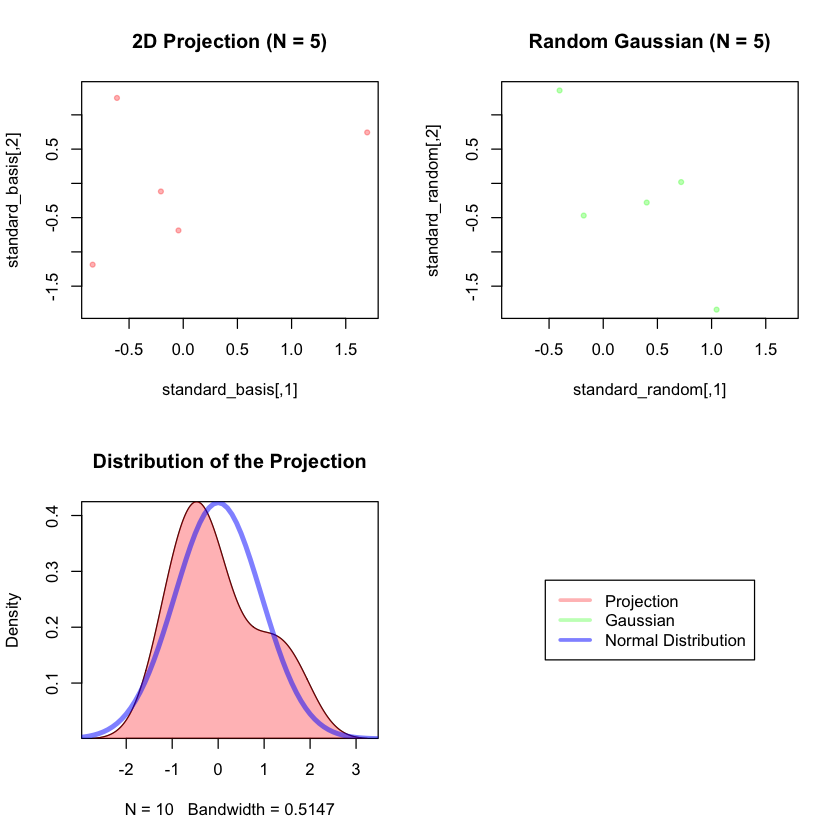

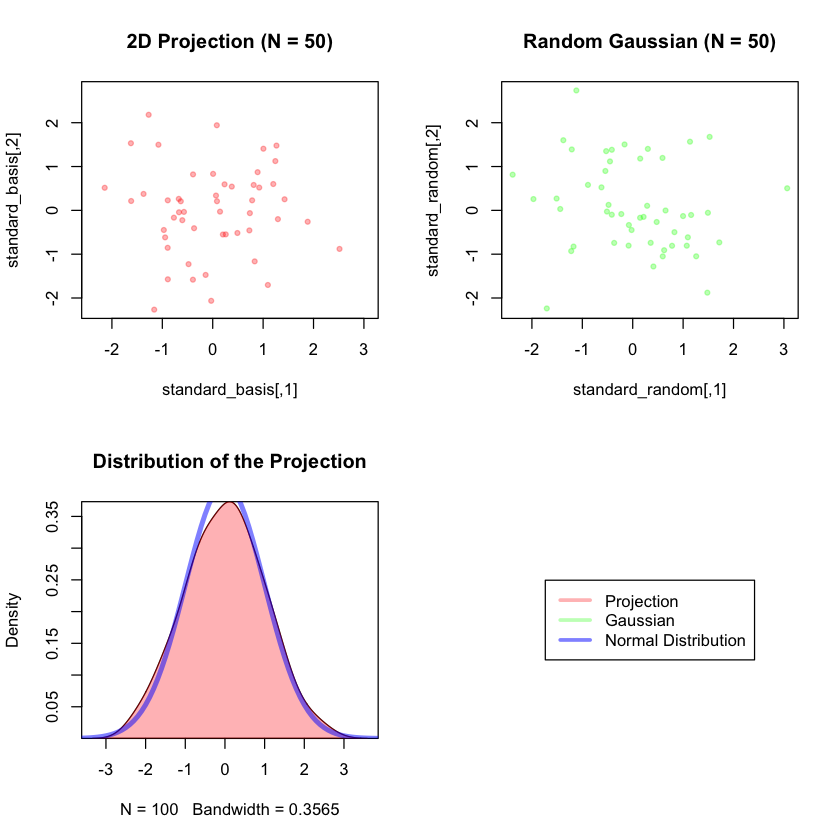

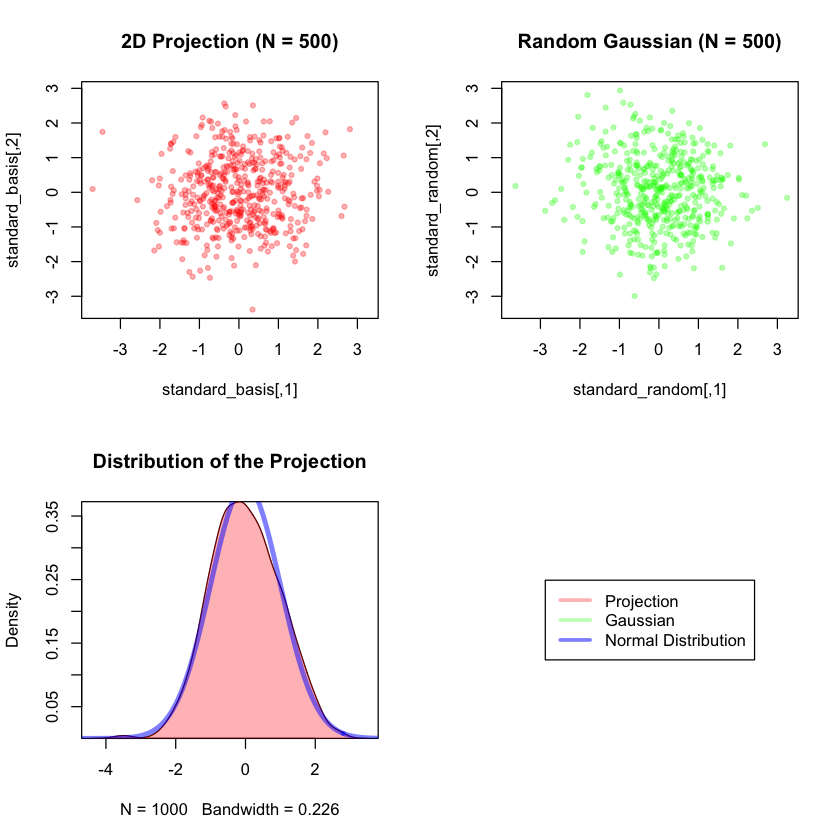

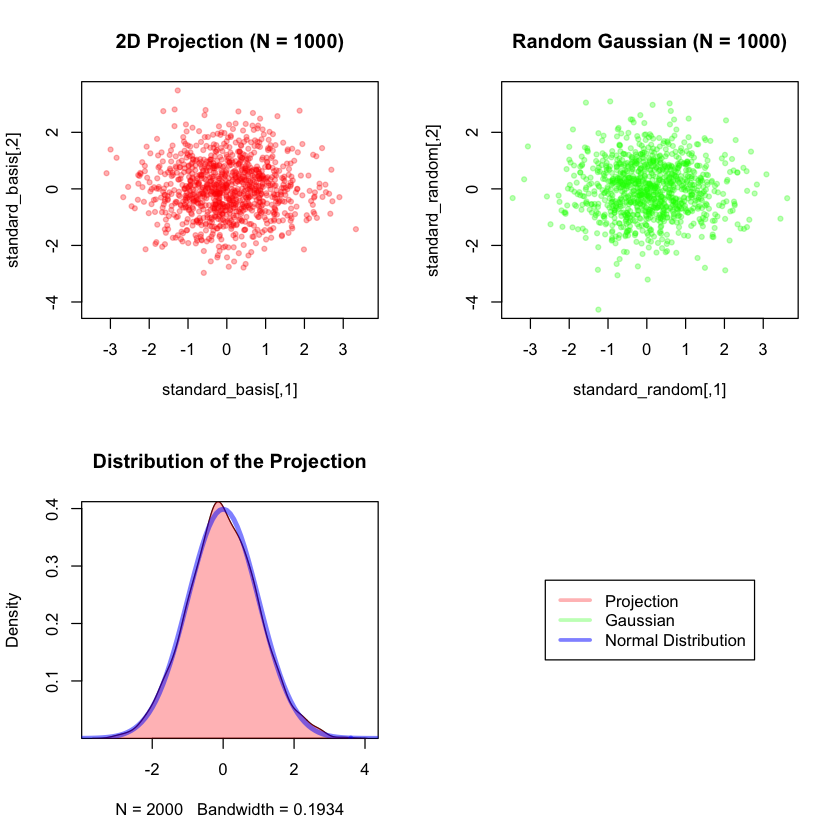

In [3]:
set.seed(34)

# Define number of dimensions to loop over
n <- c(5, 50, 500, 1000)

# Set plot window
par(mfrow=c(2,2))

for(n_iter in  1:length(n)){ 
    # Generate random projection matrix
    data <- matrix(rnorm(n[n_iter] * 2), nrow = 2, ncol = n[n_iter], byrow = T)
    # Mapping the standard basis vector to R^2 using the generated matrix
    standard_basis  <- t(data %*% diag(rep(1,times=n[n_iter]),nrow = n[n_iter]))
    # Rescale 
    standard_basis <- scale(standard_basis)
    # Create random vectors for comparision
    standard_random <- matrix(rnorm(n[n_iter] * 2), nrow = n[n_iter], ncol = 2, byrow = F)
    
    # Set colors for the graph
    colors_brew <- c(rgb(1,0,0, alpha = .3),rgb(0,1,0, alpha = .3),rgb(0,0,1, alpha = .5))
    max_vals_y <- c(min(c(standard_basis[,2],standard_random[,2])), 
                    max(c(standard_basis[,2],standard_random[,2])))
    max_vals_x <- c(min(c(standard_basis[,1],standard_random[,1])), 
                    max(c(standard_basis[,1],standard_random[,1])))
    # Plot 1: Projection
    plot(standard_basis, col=colors_brew[1], pch=20, 
         main= paste0("2D Projection (N = ", n[n_iter], ")"),
         ylim=max_vals_y, xlim = max_vals_x)
    # Plot 2: Random Gaussian
    plot(standard_random, col=colors_brew[2], pch=20, 
         main= paste0("Random Gaussian (N = ", n[n_iter], ")"),
         ylim=max_vals_y, xlim = max_vals_x)
    # Plot 3: kernel distribution vs. standard normal
    kernel <- density(standard_basis)
    plot(kernel , main="Distribution of the Projection" , yaxs='i')
    polygon(kernel , col=colors_brew[1] , border=colors_brew[1])
    lines(seq(-10,10,0.1) , dnorm( seq(-10,10,0.1) , mean(standard_basis) , sd(standard_basis) ) , 
           col=colors_brew[3] ,lwd=4)
    plot.new()
    # Legend
    legend("center", c("Projection","Gaussian","Normal Distribution"), col=colors_brew, 
           lwd=3,border = "white")
}

# Re-set plot window
par(mfrow=c(1,1))